In [2]:
! pip install pandas==1.2.5
#Это потому что в пандасе 1.3.0 и более куча косяков в методе df.to_csv(). Оно жёстко конфликтует с моей Conda.

In [3]:
! pip install wordcloud

In [124]:
import numpy as np
import pandas as pd
import datetime

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from sklearn.metrics import matthews_corrcoef
import time


swag = 69420

In [5]:
df_prices = pd.read_csv('price.tsv', sep='\t')
df_prices = df_prices.drop('GEHC', axis=1) # слишком молодая компания
print(df_prices.shape)
df_prices.head()

(2518, 521)


,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
0,2013-03-05 00:00:00,27.946215,13.245518,71.640678,13.298839,24.972109,41.335518,NaN,28.678448,16.563334,...,58.596577,39.023003,24.914204,39.376095,67.826096,44.869999,20.423979,NaN,NaN,31.940346
1,2013-03-06 00:00:00,28.326160,13.735741,70.923820,13.129805,25.125229,41.515339,NaN,28.347576,16.583332,...,58.563908,39.283100,25.693598,39.738384,67.343094,44.790001,20.907482,NaN,NaN,31.530493
2,2013-03-07 00:00:00,28.332716,13.971428,70.961044,13.281566,24.958796,41.172813,NaN,28.479918,16.813334,...,58.008087,39.515335,24.870417,39.940308,66.985306,44.619999,21.057535,NaN,NaN,32.191845
3,2013-03-08 00:00:00,28.188597,14.065701,71.538284,13.316731,24.858923,41.515339,NaN,28.686729,16.879999,...,58.178085,39.701115,24.896696,40.219440,67.441467,45.040001,21.090885,NaN,NaN,31.754053
4,2013-03-11 00:00:00,28.044483,14.263680,72.180695,13.506428,25.078619,41.575287,NaN,28.893517,16.940001,...,58.302341,39.812572,25.185684,40.290707,67.745613,45.470001,21.365984,NaN,NaN,31.837889


In [6]:
df_inf = pd.read_csv('information.tsv', sep='\t')
print(df_inf.shape)
df_inf.head()

(525, 12)


,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded,S&P-500,NASDAQ,DJI
0,A,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",05.06.00,1090872.0,1999.0,True,False,False
1,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",23.03.15,6201.0,1934.0,True,False,False
2,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",09.07.15,1158449.0,1932.0,True,False,False
3,AAPL,Apple Inc.,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",30.11.82,320193.0,1977.0,True,True,True
4,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31.12.12,1551152.0,1888.0,True,False,False


# 1.1 A

In [7]:
df_prices['Date'] = pd.to_datetime(df_prices['Date'])
df_prices.index = df_prices['Date']
df_prices.drop('Date', axis=1, inplace=True)
df_prices.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,ACN,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-05,27.946215,13.245518,71.640678,13.298839,24.972109,41.335518,NaN,28.678448,16.563334,63.810726,...,58.596577,39.023003,24.914204,39.376095,67.826096,44.869999,20.423979,NaN,NaN,31.940346
2013-03-06,28.326160,13.735741,70.923820,13.129805,25.125229,41.515339,NaN,28.347576,16.583332,64.217216,...,58.563908,39.283100,25.693598,39.738384,67.343094,44.790001,20.907482,NaN,NaN,31.530493
2013-03-07,28.332716,13.971428,70.961044,13.281566,24.958796,41.172813,NaN,28.479918,16.813334,64.349945,...,58.008087,39.515335,24.870417,39.940308,66.985306,44.619999,21.057535,NaN,NaN,32.191845
2013-03-08,28.188597,14.065701,71.538284,13.316731,24.858923,41.515339,NaN,28.686729,16.879999,64.997017,...,58.178085,39.701115,24.896696,40.219440,67.441467,45.040001,21.090885,NaN,NaN,31.754053
2013-03-11,28.044483,14.263680,72.180695,13.506428,25.078619,41.575287,NaN,28.893517,16.940001,64.955536,...,58.302341,39.812572,25.185684,40.290707,67.745613,45.470001,21.365984,NaN,NaN,31.837889


# 1.1 Б

In [8]:
df_inf['NASDAQ'].value_counts()[True]

103

In [9]:
df_inf[
    (df_inf['S&P-500']) &
    (df_inf['DJI']) &
    (df_inf['NASDAQ'])
].count()['Symbol']

5

In [10]:
df_inf[
    (df_inf['S&P-500']) &
    (df_inf['Founded'] > 1800) &
    (df_inf['Founded'] < 1900)
].count()['Symbol']

95

In [11]:
df_inf['GICS Sector'].nunique()

11

In [12]:
len(df_prices.columns.difference(df_inf['Symbol']))

58

# 1.1 В

In [13]:
biggest_sectors = list(df_inf.groupby(['GICS Sector']).count().sort_values(by=['Symbol'], ascending = False).head(3).index)

df_inf[
    (df_inf['GICS Sector'].isin(biggest_sectors)) &
    (df_inf['S&P-500'])
].count()['Symbol']

210

# 1.1 Г

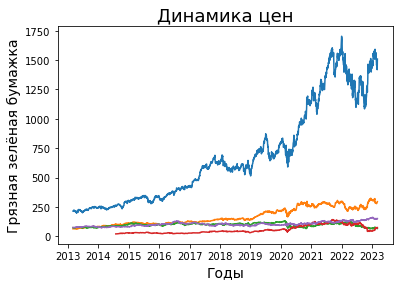

In [14]:
np.random.seed(swag)
tickers = np.random.choice(df_prices.columns, 5)


plt.plot(df_prices[tickers])
plt.xlabel('Годы', fontsize=14)
plt.ylabel('Грязная зелёная бумажка', fontsize=14)
plt.title('Динамика цен', fontsize=18);

Тут хорошо видно последствия ковида и собсна ковидный кризис. А ещё в 2016 году почему-то всё немного упало. Тут уже хз

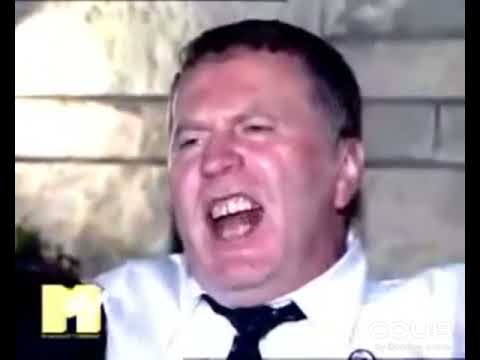

In [15]:
from IPython.display import YouTubeVideo

YouTubeVideo('vClVfDrTfCM', width=400, height=320)

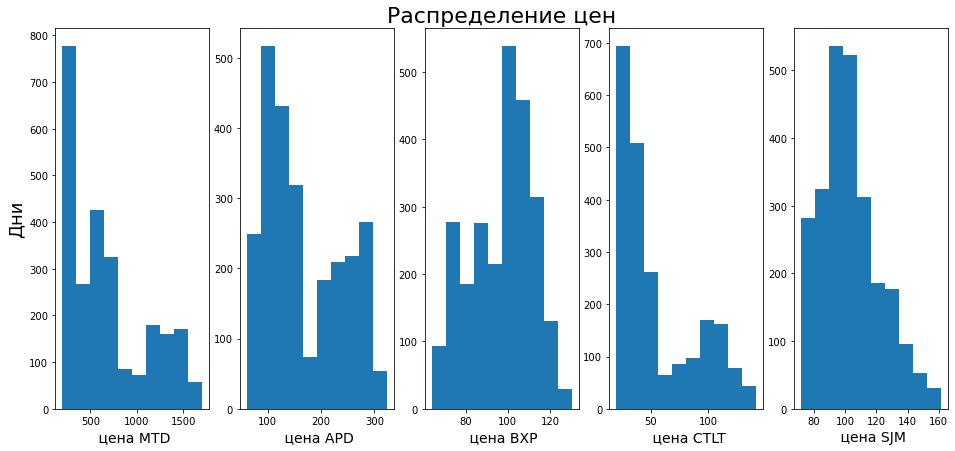

In [16]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(16, 7))
ax1.hist(df_prices[tickers[0]])
ax1.set_xlabel(f' цена {tickers[0]}', fontsize=14)
ax1.set_ylabel('Дни', fontsize=18)
ax2.hist(df_prices[tickers[1]])
ax2.set_xlabel(f' цена {tickers[1]}', fontsize=14)
ax3.hist(df_prices[tickers[2]])
ax3.set_xlabel(f' цена {tickers[2]}', fontsize=14)
ax3.set_title('Распределение цен', fontsize=22)
ax4.hist(df_prices[tickers[3]])
ax4.set_xlabel(f' цена {tickers[3]}', fontsize=14)
ax5.hist(df_prices[tickers[4]])
ax5.set_xlabel(f' цена {tickers[4]}', fontsize=14);

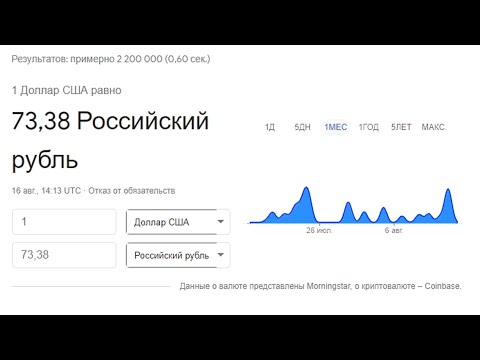

In [17]:
from IPython.display import YouTubeVideo

YouTubeVideo('RTB4QXPGFSM', width=400, height=320)

Как видно, распределения не очень похожи на нормальные

# 1.1 Д

In [18]:
df_prices_median = df_prices[
    (df_prices.index>pd.to_datetime(datetime.date(2022,2,2)))
].median(numeric_only=True).to_frame(name='Price')

df_prices_median['Symbol'] = df_prices_median.index
df_prices_median


,Price,Symbol
A,132.821701,A
AAL,14.630000,AAL
AAP,178.812378,AAP
AAPL,150.171204,AAPL
ABBV,147.131348,ABBV
...,...,...
ZBRA,310.079987,ZBRA
ZION,52.337715,ZION
ZM,88.320000,ZM
ZS,154.100006,ZS


In [19]:
df_prices_merged = df_prices_median.merge(df_inf, on='Symbol', how='left')
df_prices_merged

,Price,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded,S&P-500,NASDAQ,DJI
0,132.821701,A,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",05.06.00,1090872.0,1999.0,True,False,False
1,14.630000,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",23.03.15,6201.0,1934.0,True,False,False
2,178.812378,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",09.07.15,1158449.0,1932.0,True,False,False
3,150.171204,AAPL,Apple Inc.,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",30.11.82,320193.0,1977.0,True,True,True
4,147.131348,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31.12.12,1551152.0,1888.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,310.079987,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",23.12.19,877212.0,1969.0,True,False,False
516,52.337715,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",22.06.01,109380.0,1873.0,True,False,False
517,88.320000,ZM,Zoom Video Communications,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False
518,154.100006,ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_prices_merged.groupby('GICS Sector')['Price'].quantile(0.95)


GICS Sector
Communication Services     284.639005
Consumer Discretionary    1776.094971
Consumer Staples           244.939804
Energy                     163.812003
Financials                 352.898773
Health Care                521.180499
Industrials                431.212865
Information Technology     409.048996
Materials                  288.188727
Real Estate                308.727405
Utilities                  139.609228
Name: Price, dtype: float64

# 1.2 Е

In [21]:
df_dif = df_prices.diff(axis=0, periods=1)/df_prices.shift(1)
df_dif.drop(pd.to_datetime('2013-03-05'), inplace=True, axis=0)
df_dif

,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,ACN,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-06,0.013596,0.037010,-0.010006,-0.012710,0.006132,0.004350,NaN,-0.011537,0.001207,0.006370,...,-0.000558,0.006665,0.031283,0.009201,-0.007121,-0.001783,0.023673,NaN,NaN,-0.012832
2013-03-07,0.000231,0.017159,0.000525,0.011559,-0.006624,-0.008251,NaN,0.004669,0.013869,0.002067,...,-0.009491,0.005912,-0.032038,0.005081,-0.005313,-0.003796,0.007177,NaN,NaN,0.020975
2013-03-08,-0.005087,0.006748,0.008135,0.002648,-0.004001,0.008319,NaN,0.007262,0.003965,0.010056,...,0.002931,0.004701,0.001057,0.006989,0.006810,0.009413,0.001584,NaN,NaN,-0.013599
2013-03-11,-0.005112,0.014075,0.008980,0.014245,0.008838,0.001444,NaN,0.007208,0.003555,-0.000638,...,0.002136,0.002807,0.011607,0.001772,0.004510,0.009547,0.013043,NaN,NaN,0.002640
2013-03-12,-0.004439,0.024455,-0.002193,-0.021559,-0.013273,0.002060,NaN,0.001432,-0.000197,-0.003576,...,0.000000,-0.002567,-0.007998,0.013119,0.006073,0.001100,-0.006243,NaN,NaN,-0.010533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27,0.006940,0.004499,0.012820,0.008248,0.010281,-0.012234,0.006108,-0.006868,0.000578,-0.001051,...,-0.001806,0.006408,0.001465,-0.002050,0.004890,0.014764,0.002387,-0.002841,0.007335,-0.005170
2023-02-28,-0.001477,0.022393,0.030790,-0.003448,-0.002463,-0.006831,-0.002024,0.019545,0.011415,-0.002629,...,-0.005789,0.101881,0.000975,0.004661,0.004623,0.013570,0.004564,0.011801,-0.005234,0.009246
2023-03-01,-0.031415,0.003129,-0.042357,-0.014246,0.008902,0.006107,-0.019873,-0.008750,0.013857,-0.007381,...,0.008916,-0.018650,-0.015197,-0.007550,-0.014451,0.006961,-0.003556,-0.066631,-0.020663,0.003413


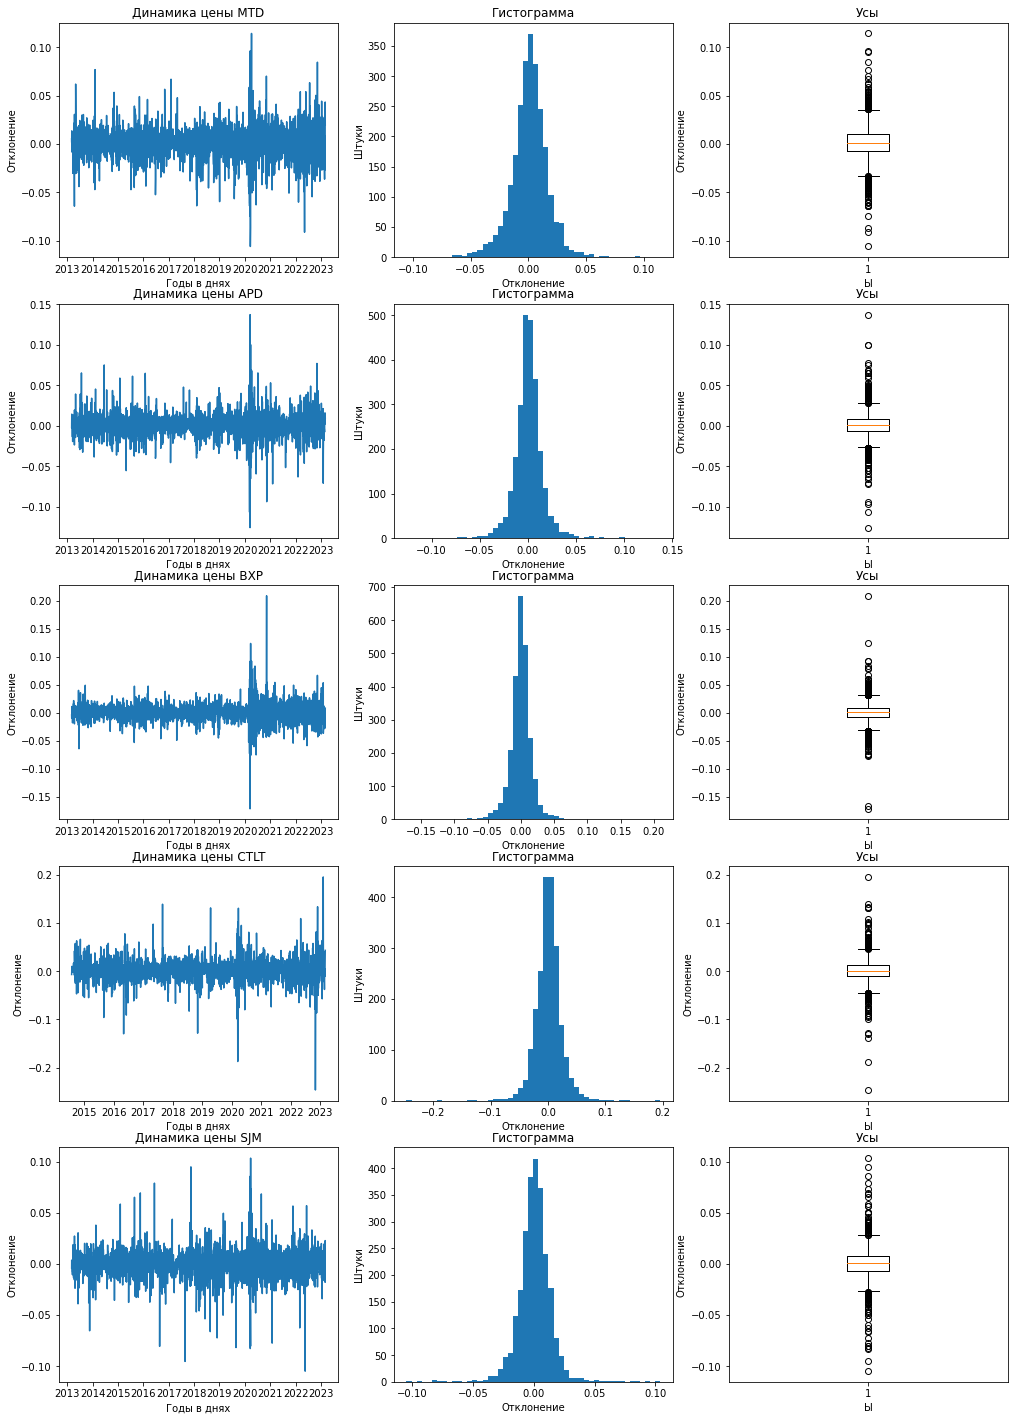

In [22]:
np.random.seed(swag)
tickers = np.random.choice(df_prices.columns, 5)
fig, axis = plt.subplots(5, 3, figsize=(17, 25))
for i in range(5):
    axis[i,0].plot(df_dif[tickers[i]])
    axis[i,1].hist(df_dif[tickers[i]], bins=50)
    df_dif['temp'] = df_dif[tickers[i]].notnull().values # Манёвр,
    axis[i,2].boxplot(df_dif[df_dif['temp']][tickers[i]]) #чтобы включить
    df_dif.drop('temp', axis=1, inplace=True) # молодые компании
    axis[i,0].set_xlabel('Годы в днях')
    axis[i,0].set_ylabel('Отклонение')
    axis[i,0].set_title(f'Динамика цены {tickers[i]}')
    axis[i,1].set_xlabel('Отклонение')
    axis[i,1].set_ylabel('Штуки')
    axis[i,1].set_title('Гистограмма')
    axis[i,2].set_xlabel('Ы')
    axis[i,2].set_ylabel('Отклонение')
    axis[i,2].set_title('Усы')

Чё-та похожее на нормальное распределение
Выбросов дофигища

# 1.2 Ё

Отдельный респект за букву ё

In [23]:
df_train = df_dif[df_dif.index  < '2022-03-03']
df_test = df_dif[df_dif.index  >= '2022-03-03']

In [24]:
df_means = df_train.mean().sort_values().to_frame('Mean')
print('Худшие')
print(df_means[:10])
print('Лучшие')
print(df_means[-10:])

Худшие
          Mean
RIVN -0.005722
VTRS -0.000168
KHC  -0.000037
GE    0.000021
IBM   0.000060
LUMN  0.000060
KMI   0.000071
SLB   0.000087
BEN   0.000105
WBD   0.000149
Лучшие
          Mean
CRWD  0.002606
TSLA  0.002746
ZS    0.002762
ENPH  0.002918
CARR  0.003140
DDOG  0.003149
GFS   0.003782
MRNA  0.003882
LCID  0.004682
CEG   0.006477


Тесла действительно есть в списке лучших

In [25]:
df_std = df_train.std().sort_values().to_frame('Std')
print('Худшие')
print(df_std[:10])
print('Лучшие')
print(df_std[-10:])

Худшие
           Std
VZ    0.011099
JNJ   0.011255
KO    0.011309
PG    0.011339
RSG   0.011408
WM    0.011432
PEP   0.011443
CL    0.011778
MMC   0.012117
COST  0.012303
Лучшие
           Std
DDOG  0.039034
CRWD  0.039878
SEDG  0.040310
GFS   0.041315
ZM    0.042788
PDD   0.045639
MRNA  0.052030
ENPH  0.052601
LCID  0.066841
RIVN  0.072406


А тут Теслы нет. Тесла хорошая

In [26]:
df_means['Symbol'] = df_means.index
df_std['Symbol'] = df_std.index
df_result = df_means.merge(df_std, on='Symbol', how='left')
df_result.index = df_result['Symbol']
df_result.drop('Symbol', inplace=True, axis=1)
df_result.head()

,Mean,Std
Symbol,,
RIVN,-0.005722,0.072406
VTRS,-0.000168,0.023982
KHC,-0.000037,0.018430
GE,0.000021,0.021182
IBM,0.000060,0.014843


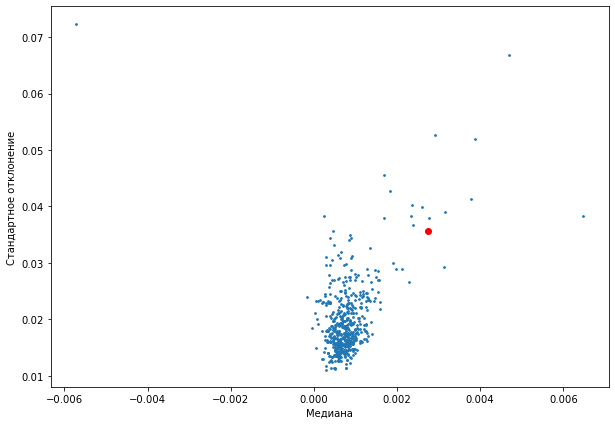

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.scatter(df_result['Mean'], df_result['Std'], s=3)
ax.set_xlabel('Медиана')
ax.set_ylabel('Стандартное отклонение')
ax.plot(df_result.loc['TSLA']['Mean'], df_result.loc['TSLA']['Std'], 'ro');

Можно было купить кое-что прибыльнее и стабильнее Теслы

In [28]:
df_result[
    (df_result['Mean']>df_result.loc['TSLA']['Mean'])&
    (df_result['Std']<df_result.loc['TSLA']['Std'])
]

,Mean,Std
Symbol,,
CARR,0.00314,0.029273


И судя по гуглу, это Carrier Global Corporation. Занимается вентиляторами и холодильниками.

(И после этого говорят, что глобального потепления нет. Ага, как же)

# 1.2 Ж

In [29]:
df_var = df_train.quantile(0.05).sort_values().to_frame('VaR') * -1
print('Рискованные')
print(df_var[:10])
print('Не рискованные')
print(df_var[-10:])

Рискованные
           VaR
RIVN  0.106831
LCID  0.075715
ENPH  0.073849
MRNA  0.072876
PDD   0.065768
ZM    0.061953
GFS   0.060479
CEG   0.058496
DDOG  0.056923
SEDG  0.055984
Не рискованные
          VaR
CL   0.016865
VZ   0.016457
SO   0.016385
JNJ  0.015890
PEP  0.015868
MCD  0.015866
RSG  0.015696
KO   0.015495
PG   0.015249
WM   0.015233


In [30]:
df_result = df_result.merge(df_var, right_index=True, left_index=True, how='left').sort_values(by='Symbol')
df_result.head()

,Mean,Std,VaR
Symbol,,,
A,0.000808,0.015556,0.025164
AAL,0.000579,0.031476,0.044087
AAP,0.000659,0.020050,0.026499
AAPL,0.001268,0.017579,0.025629
ABBV,0.000925,0.017331,0.024926


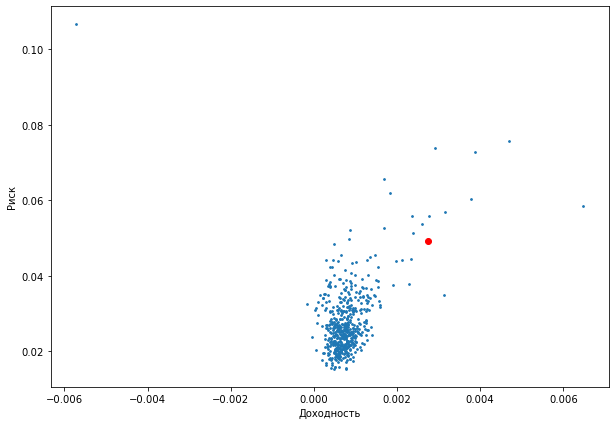

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.scatter(df_result['Mean'], df_result['VaR'], s=3)
ax.set_xlabel('Доходность')
ax.set_ylabel('Риск')
ax.plot(df_result.loc['TSLA']['Mean'], df_result.loc['TSLA']['VaR'], 'ro');

In [32]:
df_es = df_train[
    df_train<df_train.quantile(0.05)
].mean().to_frame('ES')

In [33]:
print(f"В худшие дни потеряем: {-1000*df_es.loc['TSLA']['ES']}")


В худшие дни потеряем: 75.54044469806388


In [34]:
df_good_es = df_train[
    df_train>df_train.quantile(0.95)
].mean()

In [35]:
print(f"В лучшие дни приобретём: {1000*df_good_es.loc['TSLA']}")

В лучшие дни приобретём: 93.9084648765163


In [36]:
df_result = df_result.join(df_es*-1)

In [37]:
df_result = df_result.round(3).sort_values(by='ES')
df_result['Ticker'] = df_result.index
df_result

,Mean,Std,VaR,ES,Ticker
Symbol,,,,,
PEP,0.001,0.011,0.016,0.025,PEP
VZ,0.000,0.011,0.016,0.025,VZ
PG,0.000,0.011,0.015,0.026,PG
RSG,0.001,0.011,0.016,0.026,RSG
WM,0.001,0.011,0.015,0.026,WM
...,...,...,...,...,...
PDD,0.002,0.046,0.066,0.092,PDD
MRNA,0.004,0.052,0.073,0.104,MRNA
ENPH,0.003,0.053,0.074,0.105,ENPH


In [38]:
df_result.to_csv('test_fin_1.csv',index=False, columns=['Ticker','Std','Mean','VaR', 'ES'], header=['Ticker', 'std', 'r', 'VaR', 'ES'])

# 1.З 3

In [39]:
var_tsla = df_train['TSLA'].quantile(0.05)
df_tsla = df_test['TSLA'].reset_index()
df_tsla['is_bad'] = (df_test['TSLA'].values < var_tsla)
df_tsla['is_bad'].mean()

0.14285714285714285

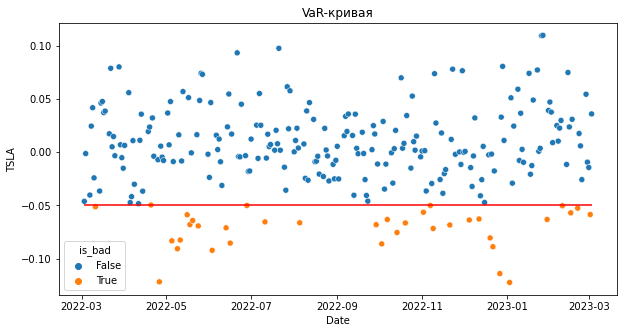

In [40]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_tsla, x='Date',y='TSLA', hue='is_bad')
plt.hlines(var_tsla, df_tsla.Date.min(), df_tsla.Date.max(), color='red')
plt.title('VaR-кривая');

Чёта проверяю это ДЗ и думаю: "Нифига се какая прямая линия... О!"

Если ты не смотрела этот шедевр, то я тебе завидую, так как тебе предстоит 5 минут идеального ютуб-ролика.

Эх, сейчас такое только с ИИ делают(((

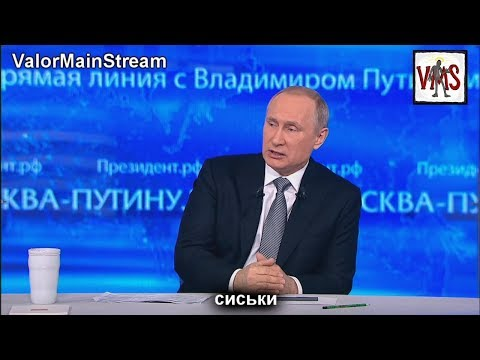

In [249]:
from IPython.display import YouTubeVideo

YouTubeVideo('XvJ1TCkzLMI', width=400, height=320)

In [45]:
df_price = pd.read_csv('price.tsv', sep='\t')
df_tesla = df_price[['TSLA', 'Date']]
df_tesla['Date'] = pd.to_datetime(df_tesla['Date'])
#df_t = df_t.diff(periods=1)/df_t.shift(1)
#df_t.drop(0,axis=0, inplace=True)
df_tesla

df_tesla_nodate = df_tesla['TSLA']
df_tesla_var = df_tesla_nodate.diff(periods=1)/df_tesla_nodate.shift(1)
df_tesla_var = df_tesla_var.to_frame('TSLA')
df_tesla_var['Date'] = df_tesla['Date']
var_list = [df_tesla_var[(df_tesla_var.index<i)&(i-1000<df_tesla_var.index)].quantile(0.05) for i in range(0, 2518)]
df_var_time = pd.DataFrame(var_list)
df_tesla_var['Var_time'] = df_tesla_var['TSLA']
df_tesla_var['Var_time'] = df_var_time.reset_index()['TSLA']
df_tesla_var['is_bad'] = df_tesla_var['Var_time']>df_tesla_var['TSLA']
df_tesla_var

<ipython-input-45-6302edad9ebf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tesla['Date'] = pd.to_datetime(df_tesla['Date'])


,TSLA,Date,Var_time,is_bad
0,NaN,2013-03-05,NaN,False
1,0.028377,2013-03-06,NaN,False
2,0.014327,2013-03-07,0.028377,True
3,0.006278,2013-03-08,0.015030,True
4,0.016376,2013-03-11,0.007083,False
...,...,...,...,...
2513,0.054602,2023-02-27,-0.064494,False
2514,-0.009247,2023-02-28,-0.064494,False
2515,-0.014292,2023-03-01,-0.064494,False
2516,-0.058539,2023-03-02,-0.064494,False


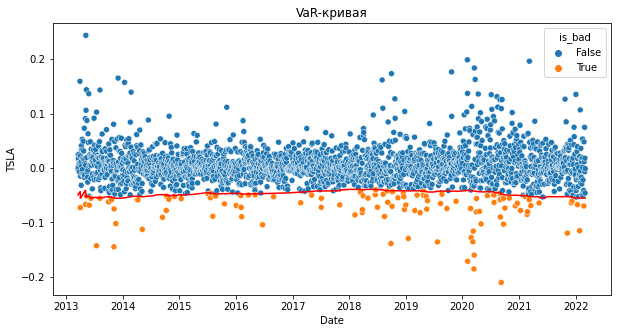

In [162]:
df_plot = df_tesla_var[10:-250] 
#Отбрасываем первые 10, так как там трешак с предсказаниями из-за малой выборки, и последние 250 потому что дальше тест
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_plot, x='Date', y='TSLA', hue='is_bad')
plt.plot(df_plot['Date'],df_plot['Var_time'], color='red')
plt.title('VaR-кривая');

In [165]:
val_list = df_plot['is_bad'].value_counts()
val_list[True]/(2518-260)

0.05181576616474756

In [ ]:
#Юху, примерно 5%

# 2.1 A

In [48]:
df = pd.read_csv('groceries.csv', sep=',')
df.columns = ['id', 'fielddate', 'product']
print(df.shape)
df.head()

(38765, 3)


,id,fielddate,product
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [49]:
df.nunique()['id']

3898

<BarContainer object of 10 artists>

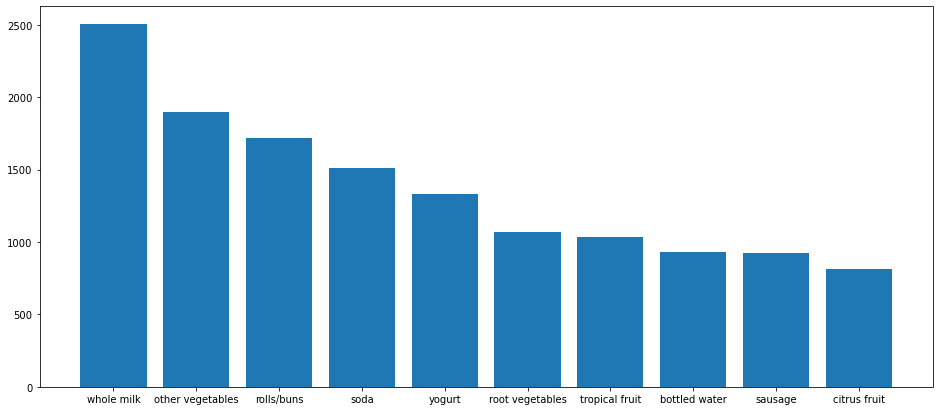

In [50]:
df_bar = df.groupby('product').count().sort_values('id', ascending=False).head(10)
fig, ax = plt.subplots(1, 1, figsize=(16, 7))
#a = 
#ax.bar([i in range(1,11)],df_bar['id'])
ax.bar(df_bar.index, df_bar['id'])

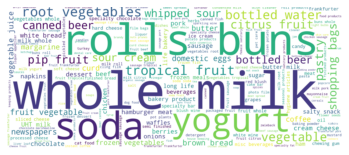

In [166]:
from wordcloud import WordCloud
text = ' '.join(df['product'])
# Create the wordcloud object
wordcloud = WordCloud(background_color='white', width=2560, height=1080).generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 2.1 Б

In [52]:
df['a'] = 1
df_pivo = pd.pivot_table(df, values='a', index='id', columns='product', aggfunc=np.sum, fill_value=0)
df_pivo

product,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
id,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


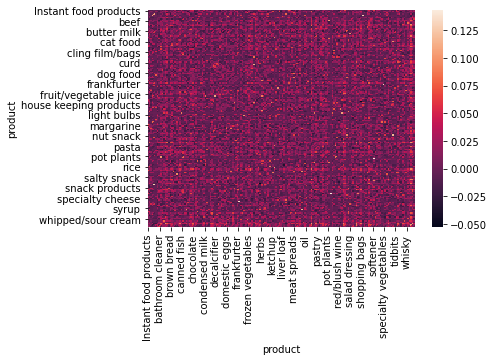

In [54]:
df_pirs = df_pivo.corr()
sns.heatmap(df_pirs-np.eye(df_pivo.shape[1]));

In [55]:
df_pirs['domestic eggs'].sort_values()[-10:]

product
white wine               0.044977
fruit/vegetable juice    0.048757
coffee                   0.049023
oil                      0.055624
meat                     0.057861
rubbing alcohol          0.060533
newspapers               0.064502
whole milk               0.072512
meat spreads             0.083607
domestic eggs            1.000000
Name: domestic eggs, dtype: float64

Это просто НЕВЕРОЯТНО! Когда люди покупают яйца... Они всегда покупают яйца! Невероятная корреляция

А из других зависимостей есть молоко (правда хз, молока в целом дофига покупают) и алкоголь с яйцами (я всегда вместе покупаю). Яйца для семьи, а алкоголь для души

In [56]:
df_pirs['domestic eggs'].sort_values()[:10]

product
pet care               -0.024206
cooking chocolate      -0.023280
ready soups            -0.023280
dessert                -0.021004
cream                  -0.020814
soft cheese            -0.020077
specialty vegetables   -0.019925
frozen fruits          -0.019925
ketchup                -0.019409
organic products       -0.018996
Name: domestic eggs, dtype: float64

Люди с яйцами не любят животных(

In [57]:
df_pirs = df_pirs-np.eye(df_pivo.shape[1])
max_cor_1 = df_pirs.max().idxmax()
max_cor_2 = df_pirs[max_cor_1].idxmax()
print(max_cor_1 + ' & ' + max_cor_2)

preservation products & soups


С яйцами сильнее всего коррелируют консервы и супы. Почему - хз. Наверное потому что датасет американский а там повёрнутые ребята готовясь к концу света скупают супы Campbell и консервы.

А вообще корреляция - не лучший метод считать, потому что: Under heavy noise conditions, extracting the correlation coefficient between two sets of stochastic variables is nontrivial, in particular where Canonical Correlation Analysis reports degraded correlation values due to the heavy noise contributions. A generalization of the approach is given elsewhere. (Источник: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

# 2.2 В

In [58]:
# Тут наверняка можно сделать что-то умное, чтобы считалось только наличие товара без количества
# Но я глупый, поэтому просто сделаю True/False
# А далее воспользуюсь тем, что для питона True==1, а False==0
df_pivo_2 = pd.pivot_table(df, values='a', index='id', columns='product', aggfunc=np.any, fill_value=False)
df_pivo_2

product,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
id,,,,,,,,,,,,,,,,,,,,,
1000,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1001,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
1002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
4998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [92]:
df_noindx_pivo = df_pivo_2.sum().to_frame()
df_noindx_pivo['products'] = df_noindx_pivo.index
df_noindx_pivo.index = list(range(df_noindx_pivo.shape[0]))
unpop_goods = df_noindx_pivo[(df_noindx_pivo[0]<10)]['products'].values
pop_goods = df_noindx_pivo[(df_noindx_pivo[0]>=10)]['products'].values
df_pivo_2.drop(unpop_goods, axis=1, inplace=True)

In [151]:
start = time.time()
comb_list = list(combinations(pop_goods,2))
coef_list = []
mat_dict = {'product_1': [], 'product_2': [], 'matthews_corrcoef': []}
for item in comb_list:
    pivo = np.array(df_pivo_2[item[0]].values, dtype=bool) #Почему-то содержание df_pivo_2[item[0]].values
    tozhe_pivo = np.array(df_pivo_2[item[1]].values, dtype=bool) #считается как obj вместо bool
    mat = matthews_corrcoef(pivo, tozhe_pivo)
    mat_dict['product_1'].append(item[0])
    mat_dict['product_2'].append(item[1])
    mat_dict['matthews_corrcoef'].append(mat)
    
    
print("--- %s seconds ---" % (time.time() - start))
df_mat = pd.DataFrame(mat_dict, index=range(len(mat_dict['product_1'])))
df_mat

--- 27.374048233032227 seconds ---


,product_1,product_2,matthews_corrcoef
0,Instant food products,UHT-milk,-0.005502
1,Instant food products,abrasive cleaner,-0.009420
2,Instant food products,artif. sweetener,-0.010825
3,Instant food products,baking powder,-0.010363
4,Instant food products,bathroom cleaner,-0.008275
...,...,...,...
11776,white wine,yogurt,0.042513
11777,white wine,zwieback,-0.006570
11778,whole milk,yogurt,0.093302
11779,whole milk,zwieback,0.035588


In [160]:
df_mat.sort_values('matthews_corrcoef', ascending=False)[:100].to_csv('result_matthews.csv', index=False)

# 2.3 Г

In [183]:
#Ого, нифига себе, я предсказал будущее и сразу сделал табличку True|False!
df_pivo_mini = df_pivo_2[['whole milk', 'domestic eggs']]
p_milk = df_pivo_mini.mean()[0]
p_eggs = df_pivo_mini.mean()[1]
p_milkeggs = df_pivo_mini.all(axis=1).mean()
print(p_milkeggs/(p_milk * p_eggs))

1.152241691425711


Больше 1, значит зависят друг от друга положительно

# 2.3 Д

In [194]:
start = time.time()
comb_list = list(combinations(pop_goods,2))
coef_list = []
lift_dict = {'product_1': [], 'product_2': [], 'lift': []}
for item in comb_list:
    #pivo = np.array(df_pivo_2[item[0]].values, dtype=bool) #Почему-то содержание df_pivo_2[item[0]].values
    #tozhe_pivo = np.array(df_pivo_2[item[1]].values, dtype=bool) #считается как obj вместо bool
    #mat = matthews_corrcoef(pivo, tozhe_pivo)
    p_1 = df_pivo_2[item[0]].values.mean()
    p_2 = df_pivo_2[item[1]].values.mean()
    df_pivo_temp = df_pivo_2[[item[0], item[1]]]
    p_12 = df_pivo_temp.all(axis=1).mean()
    lift = p_12/(p_1 * p_2)
    lift_dict['product_1'].append(item[0])
    lift_dict['product_2'].append(item[1])
    lift_dict['lift'].append(lift)
    
    
print("--- %s seconds ---" % (time.time() - start))
df_lift = pd.DataFrame(lift_dict, index=range(len(lift_dict['product_1'])))
df_lift

--- 13.276212930679321 seconds ---


,product_1,product_2,lift
0,Instant food products,UHT-milk,0.849237
1,Instant food products,abrasive cleaner,0.000000
2,Instant food products,artif. sweetener,0.000000
3,Instant food products,baking powder,0.536915
4,Instant food products,bathroom cleaner,0.000000
...,...,...,...
11776,white wine,yogurt,1.314976
11777,white wine,zwieback,0.755426
11778,whole milk,yogurt,1.161510
11779,whole milk,zwieback,1.309518


In [195]:
df_lift.sort_values('lift', ascending=False)[:100].to_csv('result_lift.csv', index=False)

# 2.3 E

In [217]:
#10 с самым высоким lift
df_lift.sort_values('lift')[:10]

,product_1,product_2,lift
3864,chocolate marshmallow,roll products,0.0
2973,canned fruit,sliced cheese,0.0
1650,brandy,cooking chocolate,0.0
1651,brandy,cookware,0.0
1652,brandy,cream,0.0
6167,female sanitary products,potato products,0.0
2972,canned fruit,skin care,0.0
1655,brandy,curd cheese,0.0
1656,brandy,dental care,0.0
10380,pickled vegetables,sparkling wine,0.0


In [218]:
#10 с самым низким lift
df_lift.sort_values('lift')[:10]

,product_1,product_2,lift
3864,chocolate marshmallow,roll products,0.0
2973,canned fruit,sliced cheese,0.0
1650,brandy,cooking chocolate,0.0
1651,brandy,cookware,0.0
1652,brandy,cream,0.0
6167,female sanitary products,potato products,0.0
2972,canned fruit,skin care,0.0
1655,brandy,curd cheese,0.0
1656,brandy,dental care,0.0
10380,pickled vegetables,sparkling wine,0.0


На первый взгляд кажется, что брэнди - это какой-то продукт одиночка и ни с кем не дружит. Однако на самом деле мы просто не видим большей картины. Более 2400 пар товаров (примерно 20% от общего числа) никогда не покупались вместе. Просто выборка слишком маленькая, 4000 чеков недостаточно, чтобы точно все товары покупались хоть раз одновременно. Так бывает, некоторые товары непопулярны, и когда мы берём два очень непопулярных товара, то вероятно они вообще никогда в чеках не пересекались

In [219]:
#10 с самым высоким lift
df_lift.sort_values('lift', ascending=False)[:10]

,product_1,product_2,lift
6669,flower soil/fertilizer,organic products,24.362500
7995,honey,ready soups,19.989744
9689,nut snack,tea,19.686869
7958,honey,ketchup,18.740385
4715,cooking chocolate,ready soups,17.324444
2954,canned fruit,potato products,16.874459
7114,frozen fruits,tidbits,16.107438
7993,honey,prosecco,15.781377
8009,honey,skin care,14.992308
4713,cooking chocolate,prosecco,13.677193


Тут тоже в целом всё логично. Снэки с чаем покупают к чаепитию, а удобрения с органическими продуктами для цветов.

А наличие аж 4 строк с мёдом легко объясняется маленьким количеством мёда в чеках. Покупок с мёдом всего 13! Может просто один чувак купил два раза одно и то же. Мёд, Просекко, продукты для ухода за кожей - это похоже на комплект для 8 марта. Какой-то ленивый мужик мог купить два или три одинаковых комплекта подарков для жены, мамы и сестры

In [220]:
df_pivo_2['honey'].sum()

13

Нижние пары сильно отличаются, так как товары без корреляции, при подсчёте с помощью коэффициента Мэтьюса, находятся в середине списка, а те же товары, при подсчёте методом поддержки, находятся в самом низу списка. И там и там это ноль, но диапазон коэффициента Мэтьюса от -1 до 1, а lift от 0 до +бесконечности

Верхние пары тоже отличаются, но немного по другой причине. Lift гораздо чувствительнее к размеру выборки, чем коэффициент Мэтьюса. Поэтому для вычисления краевых зависимостей в недостаточно большой выборке последний метод лучше

Ну и напоследок делюсь апдейтами о своей жизни. Я закончил Metal Gear Rising (И перепрошёл его ещё 6 раз). Сейчас играю в Диско Элизиум, но там нет мемов, только депрессуха.

И в этой домашке мало мемов, потому что она просто гигантская и сильно меня вымотала